In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
f = np.logspace(-1,7,100)
w = 2*np.pi*f

stage1: 10x amplify and low-pass filter around 300kHz 

In [26]:
def f1(R1,R2,C1):
    out = - R2/(R1*(1j*w*C1*R2+1))
    return out

0.10610329539459691

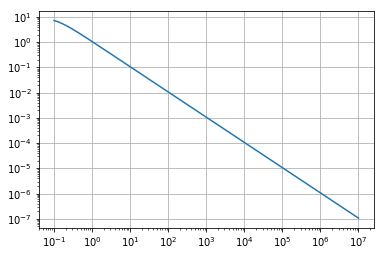

In [27]:
r1 = 1000
r2 = 10e3
c1 = 150e-6
1/(c1*r2)/(2*np.pi)
out1 = f1(r1, r2, c1)
plt.loglog(f,np.abs(out1))
plt.grid()
1/(c1*r2)/(2*np.pi)

stage2: low pass filter

In [6]:
def f2close(R1,R2,C1):
    out = - R2/(R1*(1j*w*C1*R2+1))
    return out

def f2open(R1,R2,C1):
    out = - 1/(R1*(1j*w*C1))
    return out

0.7234315595086153

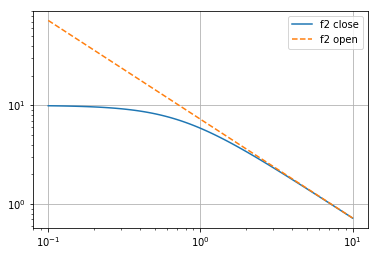

In [18]:
r21 = 1e3
r22 = 10e3
c21 = 22e-6
out2open = f2open(r21, r22, c21)
out2close = f2close(r21,r22,c21)
plt.loglog(f,np.abs(out2close), label = 'f2 close')
plt.loglog(f,np.abs(out2open), label = 'f2 open',ls='dashed')
plt.legend()
plt.grid()
1/(c21*r22)/(2*np.pi)

stage3: low frequency boost

In [12]:
def f3open(R1,R2,C1):
    out = - (1/(1j*w*C1)+R2)/R1
    return out

def f3close(R1,R2,C1):
    out = - R2*w/(R1*w)
    return out
    

2.0404479883576325

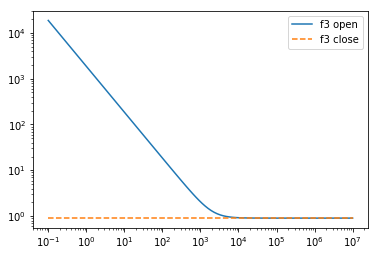

In [13]:
r31 = 2.2e3
r32 = 2e3
c31 = 39e-9
out3open = f3open(r31, r32, c31)
out3close = f3close(r31,r32, c31)
plt.loglog(f,np.abs(out3open), label = 'f3 open')
plt.loglog(f,np.abs(out3close), label = 'f3 close',ls='dashed')
plt.legend()
1/(c31*r32)/(2*np.pi)/1000

stage4: gain

In [14]:
def f4(R1, R2, C1):
    out = - R2/(R1*(1j*w*C1*R2+1))
    return out
    

312.0685158664615

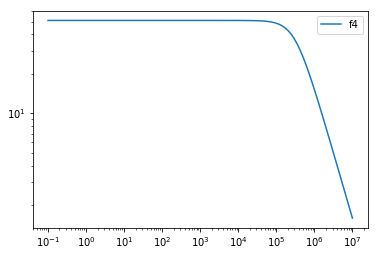

In [15]:
r41 = 100 # variable resistor
r42 = 5.1e3
c41 = 100e-12
out4 = f4(r41, r42, c41)
plt.loglog(f,np.abs(out4), label = 'f4')
plt.legend()
1/(c41*r42)/(2*np.pi)/1000

stage5: output

In [16]:
def f5open(R1,R2,R3,R4):
    out = - R4*w/(R1*w)
    return out

def f5close(R1,R2,R3,R4):
    out = ((R1*R3 - R2*R4)*w)/(R1*(R2 + R3)*w)
    return out
    

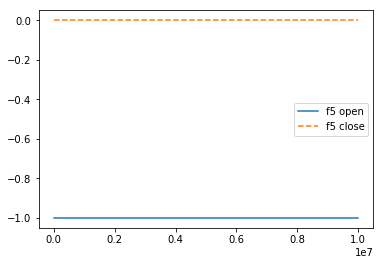

In [17]:
r51 = 2e3
r52 = 2e3
r53 = 2e3
r54 = 2e3
out5open = f5open(r51,r52,r53,r54)
out5close = f5close(r51,r52,r53,r54)
plt.plot(f, out5open, label = 'f5 open')
plt.plot(f, out5close, label = 'f5 close',ls='dashed')
plt.legend()

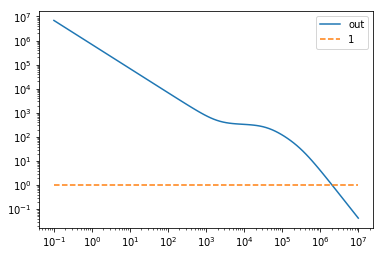

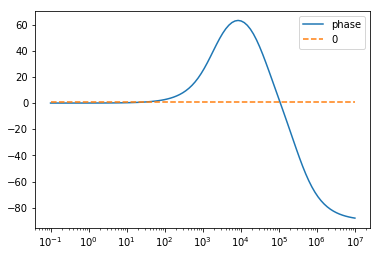

In [24]:
out = f**1*out1*out2open*out3open*out4*out5open
plt.loglog(f, abs(out), label='out')
#plt.loglog(f,abs(f*out), label='out*f')
#plt.loglog(f, abs(f**2*out),label='out*f^2')
plt.loglog(f,f/f,label='1',ls='dashed')
plt.legend()
plt.figure()
plt.plot(f,np.angle(out,deg=True), label='phase')
plt.plot(f,f/f,label='0',ls='dashed')
plt.legend()
plt.xscale('log')

In [24]:
1/(2*np.pi*10e3*470e-12)/1000

33.862753849339434